In [49]:
'''
    Process the data.
'''
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [50]:
to_drop = ['id','belongs_to_collection','homepage','imdb_id','original_title','title','original_language','overview','poster_path','status','tagline','Keywords']
for x in to_drop:
    train_df = train_df.drop(x,axis=1)
    if x!= 'revenue':
        test_df = test_df.drop(x,axis=1)

In [51]:

train_df['spoken_languages'] = train_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['spoken_languages'] = test_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['production_companies'] =train_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['production_companies'] = test_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['production_countries'] =train_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df ['production_countries']= test_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['cast'] =train_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['cast'] = test_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['crew'] =train_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['crew'] = test_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['genres'] =train_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df ['genres']= test_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)

def ap(x):
    if type(x)==str:
        n = int(x.split('/')[2])
        if(n<=19):
            return 2000+n
        else:
            return 1900+n
    else:
        return 0


# train_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
train_df['release_year'] = train_df['release_date'].apply(ap)
# train_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )
# test_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
test_df['release_year'] = train_df['release_date'].apply(ap)
# test_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )



In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(x_val, y_val):
    %matplotlib inline
    plt.plot(x_val[0], y_val[0], 'bo', label='Training')
    plt.xlabel(x_val[1])
    plt.ylabel(y_val[1])
    plt.legend()
    plt.show()

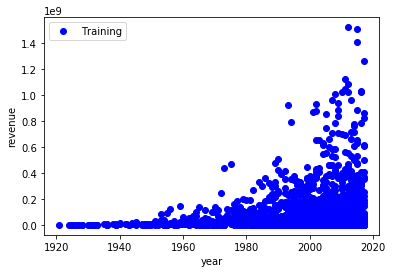

In [10]:
plot_graph([train_df['release_year'],'year'],[train_df['revenue'],'revenue'])

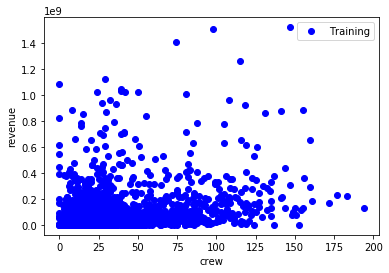

In [11]:

plot_graph([train_df['crew'],'crew'],[train_df['revenue'],'revenue'])

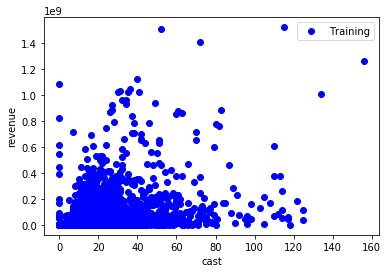

In [12]:
plot_graph([train_df['cast'],'cast'],[train_df['revenue'],'revenue'])

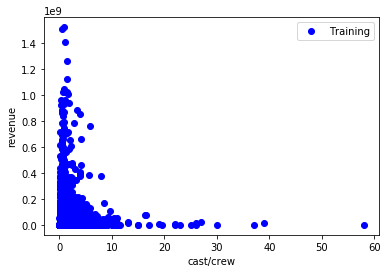

In [13]:
plot_graph([train_df['cast']/train_df['crew'],'cast/crew'],[train_df['revenue'],'revenue'])

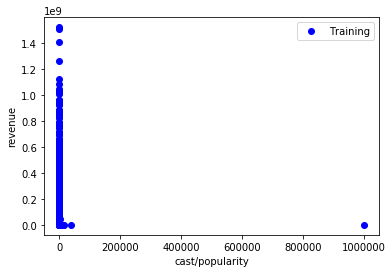

In [14]:
plot_graph([train_df['cast']/train_df['popularity'],'cast/popularity'],[train_df['revenue'],'revenue'])

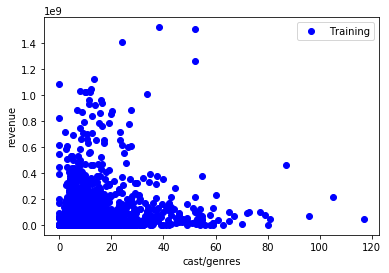

In [15]:
plot_graph([train_df['cast']/train_df['genres'],'cast/genres'],[train_df['revenue'],'revenue'])

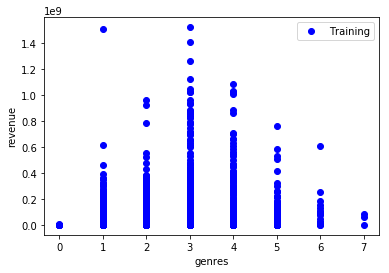

In [16]:
plot_graph([train_df['genres'],'genres'],[train_df['revenue'],'revenue'])

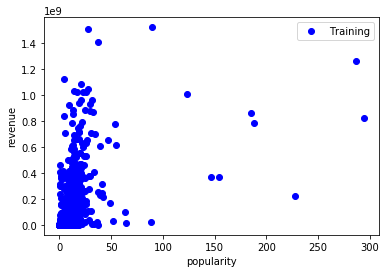

In [17]:
plot_graph([train_df['popularity'],'popularity'],[train_df['revenue'],'revenue'])

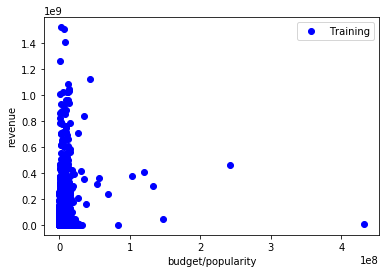

In [18]:
plot_graph([train_df['budget']/train_df['popularity'],'budget/popularity'],[train_df['revenue'],'revenue'])

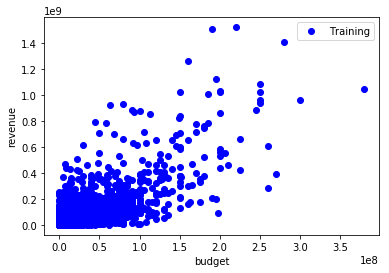

In [19]:
plot_graph([train_df['budget'],'budget'],[train_df['revenue'],'revenue'])

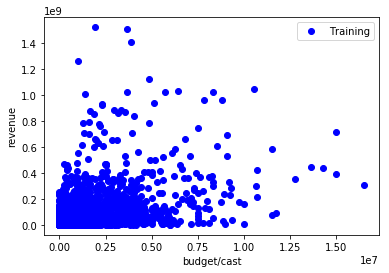

In [20]:
plot_graph([train_df['budget']/train_df['cast'],'budget/cast'],[train_df['revenue'],'revenue'])

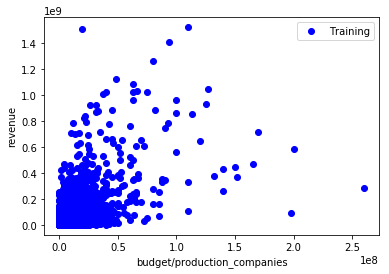

In [21]:
plot_graph([train_df['budget']/train_df['production_companies'],'budget/production_companies'],[train_df['revenue'],'revenue'])

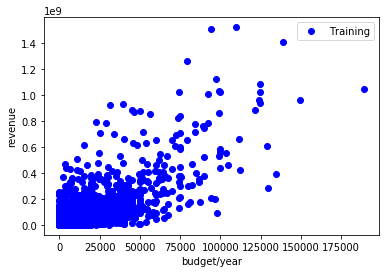

In [23]:
plot_graph([train_df['budget']/train_df['release_year'],'budget/year'],[train_df['revenue'],'revenue'])

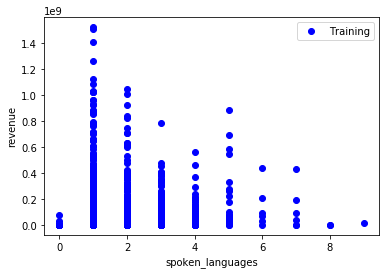

In [24]:
plot_graph([train_df['spoken_languages'],'spoken_languages'],[train_df['revenue'],'revenue'])

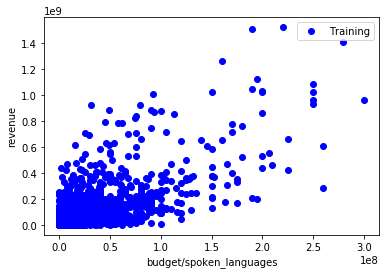

In [25]:
plot_graph([train_df['budget']/train_df['spoken_languages'],'budget/spoken_languages'],[train_df['revenue'],'revenue'])

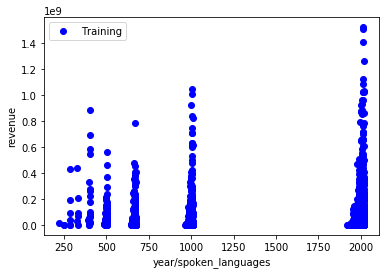

In [27]:
plot_graph([train_df['release_year']/train_df['spoken_languages'],'year/spoken_languages'],[train_df['revenue'],'revenue'])

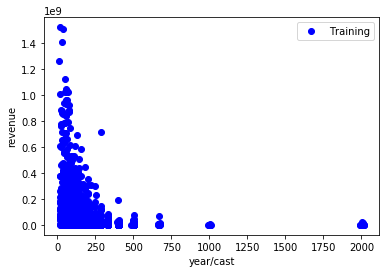

In [28]:
plot_graph([train_df['release_year']/train_df['cast'],'year/cast'],[train_df['revenue'],'revenue'])

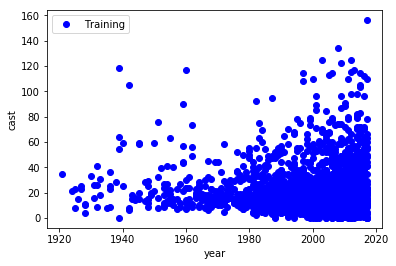

In [29]:
plot_graph([train_df['release_year'],'year'],[train_df['cast'],'cast'])

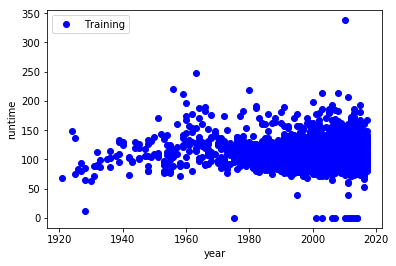

In [30]:
plot_graph([train_df['release_year'],'year'],[train_df['runtime'],'runtime'])

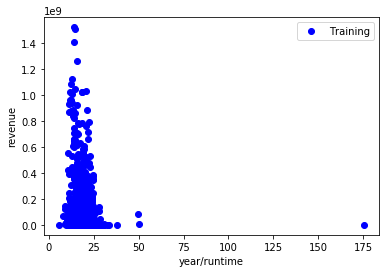

In [31]:
plot_graph([train_df['release_year']/train_df['runtime'],'year/runtime'],[train_df['revenue'],'revenue'])

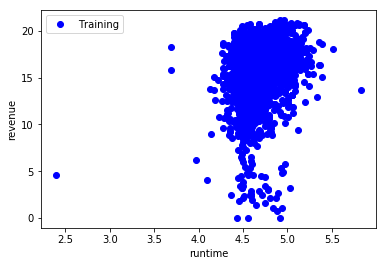

In [35]:

plot_graph([train_df['runtime'].apply(np.log),'runtime'],[train_df['revenue'].apply(np.log),'revenue'])

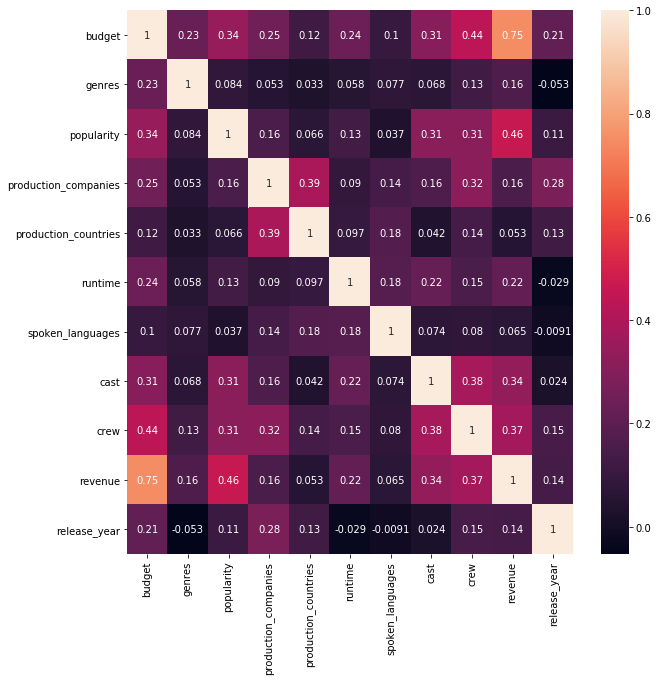

In [53]:
import seaborn as sns

df = train_df
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,ax=ax)

In [59]:
yearvsrev = (df.groupby(['release_year'], as_index=False).mean())[['release_year','revenue']]

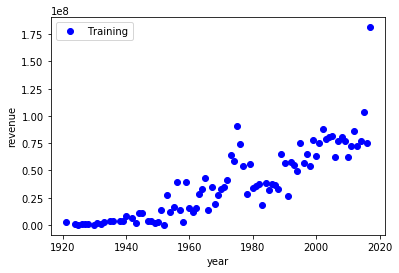

In [61]:
plot_graph([yearvsrev['release_year'],'year'],[yearvsrev['revenue'],'revenue'])

In [65]:
df_for_merge = df[['release_year']]
df_for_merge

,release_year
0,2015
1,2004
2,2014
3,2012
4,2009
5,1987
6,2012
7,2004
8,1996
9,2003


In [70]:
df['avg_rev_per_year'] =pd.merge(df_for_merge,yearvsrev, how = 'left', on = "release_year")

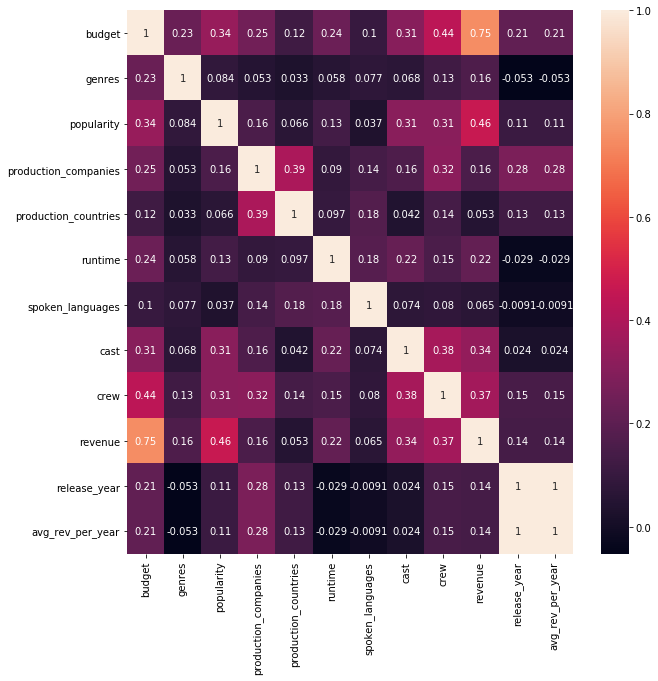

In [71]:
import seaborn as sns

df = train_df
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,ax=ax)